# Declaration of Originality

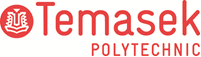

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [36]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: 

The goal of this project is to develop a regression model that predicts the house prices based on key characterictics of the property like the number of bedrooms, floor level, distance from key necessities and property age. This model aims to reduce pricing uncertainty in the real estate market by providing data-driven price estimates based on property characteristics.

The prediction will then be used to help buyers, sellers, and real estate stakeholders to make more informed pricing and investment decisions by providing an estimated market value for a property.

# 2. Data Understanding

## 2.1 Load dataset

In [37]:
## Read *.csv file into pandas DataFrame
FILE_PATH='house.csv'
df = pd.read_csv(FILE_PATH)
df


,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126


This dataset contains 4308 rows and 7 columns with multiple numerical fatures. This makes the dataset suitable for regression modelling without categorical encoding.

## 2.2 Summary Statistics

In [38]:
## Understand the type of variable for each column
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [39]:
## Check for missing data
df.isna().sum()


bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [40]:
# checks for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [41]:
## Describe data distribution
df.describe(include='all')

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


## Dataset Overview and Summary Statistics

The dataset consists of 4308 rows and 7 columns, where all variables are numerical in nature. This makes the dataset suitable for regression modelling without the need for categorical encoding.

There are no missing values, negative inputs or duplicate records, indicating that the dataset is clean and does not require additional data cleaning or imputation at this stage.

From the summary statistics, house prices have a mean of approximately 95,700, while the median price, the 50th percentile, is around 95,338. The close similarity between the mean and median suggests that the distribution of house prices is relatively balanced.

Overall, the summary statistics show sufficient variability across both the features and the target variable, making the dataset suitable for regression modelling.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

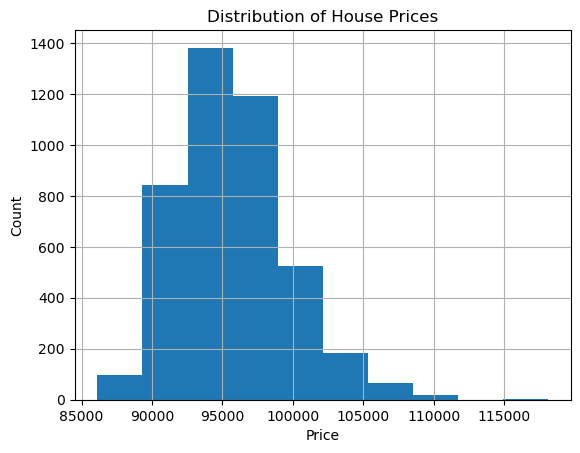

In [42]:
## Understanding distribution of target (price)
col_y='price'

df[col_y].hist()
plt.title("Distribution of House Prices")
plt.suptitle('')
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


The distribution of the target variable, house price, shows a slightly right-skewed distribution with most values concentrated between approximately 90,000 to 100,000. This skewness suggests that while the majority of properties fall within a mid-price range, a smaller number of higher-priced properties are present.

This skewness suggests that extreme values may influence model performance, particularly for models that assume normally distributed residuals, such as linear regression. As a result, evaluation metrics that penalise larger errors more strongly, such as RMSE, will be considered to ensure that prediction errors on higher-priced properties are appropriately captured.

In subsequent modelling stages, both linear and tree-based models will be evaluated to assess their robustness to skewed target distributions, and target transformation may be considered if it leads to improved predictive performance.

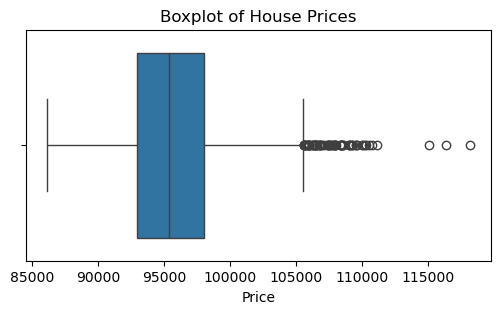

In [43]:
# Boxplot to check spread and potential outliers in price
plt.figure(figsize=(6,3))
sns.boxplot(x=df["price"])
plt.title("Boxplot of House Prices")
plt.xlabel("Price")
plt.show()

The boxplot shows the central tendency and spread of house prices, with the median price located near the centre of the interquartile range. This indicates that the middle 50% of house prices are relatively tightly clustered around the mid-price range.

Several points appear above the upper whisker, representing higher-priced properties that can be considered outliers relative to the majority of the data. These observations support the earlier histogram finding of a slightly right-skewed distribution.

From a modelling perspective, these high-price outliers may increase prediction error for models that are sensitive to extreme values, such as linear regression. However, since these properties likely reflect legitimate market conditions rather than data errors, they will be retained in the dataset. Tree-based models, which are more robust to outliers, will be evaluated alongside linear models, and evaluation metrics such as RMSE will be used to appropriately capture larger prediction errors.

### 2.3.1.2 Understanding distribution of features

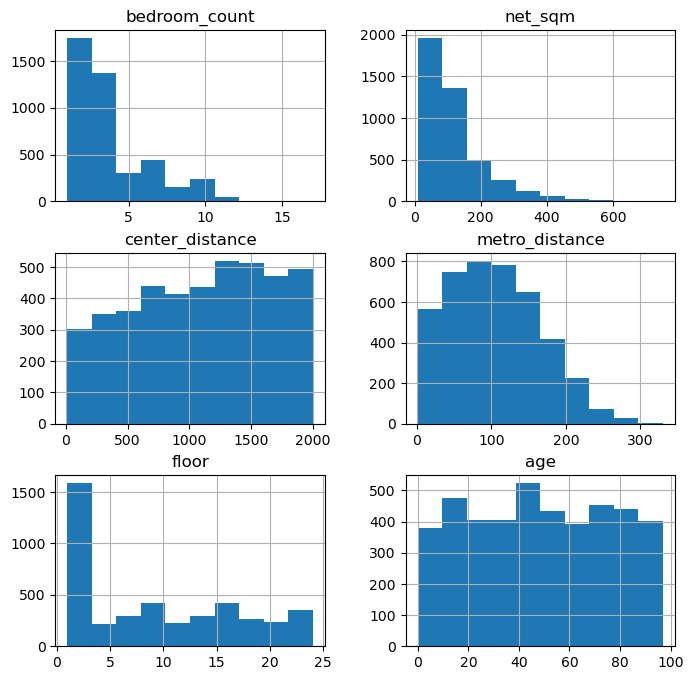

In [44]:
## Understanding distribution of features
feature_cols= df.drop(columns=[col_y])
feature_cols.hist(figsize=(8,8)) 
plt.show()

The feature distributions show varying levels of skewness and spread across the dataset. 'bedroom_count' is right-skewed, with most properties having between one and five bedrooms, indicating that larger units are less common. Similarly, 'net_sqm' exhibits a right-skewed distribution, suggesting that extremely large properties are relatively rare compared to typical housing units.

Both 'center_distance' and 'metro_distance' display wide distributions, reflecting a mix of centrally located and more suburban properties. This variation suggests that location-related features may play an important role in explaining price differences. The 'floor' feature shows a discrete distribution, with a higher concentration of properties on lower floor levels and fewer properties on higher floors, indicating that most units are low- to mid-rise. The 'age' feature is relatively evenly distributed, indicating the presence of both newer and older properties in the dataset.

From a modelling perspective, the presence of skewed features suggests that models sensitive to feature scale, such as linear regression, may benefit from feature scaling or transformation. In contrast, tree-based models, which are less affected by skewness, may naturally handle these distributions more effectively. As such, multiple model types will be evaluated in later stages to assess their robustness to these feature distributions.

### 2.3.2 Understanding relationship between variables

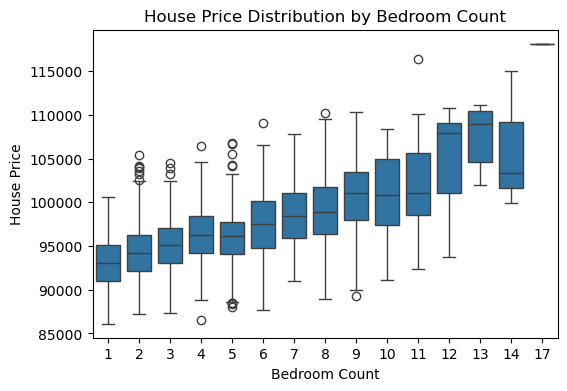

In [45]:
## Understanding relationship between variables
plt.figure(figsize=(6,4))
sns.boxplot(x=df['bedroom_count'], y=df['price'])
plt.xlabel("Bedroom Count")
plt.ylabel("House Price")
plt.title("House Price Distribution by Bedroom Count")
plt.show()

The boxplot shows a clear increasing trend in median house prices as bedroom count increases, indicating that properties with more bedrooms generally command higher prices. This confirms bedroom count as a meaningful feature for explaining variations in house prices.

The spread of prices also increases for higher bedroom counts, suggesting greater variability among larger properties. Several outliers are visible across different bedroom categories, particularly at higher counts, indicating that while most properties follow the general pricing trend, some higher-priced units exist within each group.

A boxplot was chosen because bedroom count is a discrete numerical variable. The boxplot allows clearer comparison of price distributions across each bedroom category by highlighting medians, interquartile ranges, and outliers. This makes it easier to assess how house prices vary between bedroom groups and to identify variability that may affect model performance.

From a modelling perspective, the presence of increasing variance and outliers suggests that while linear models may capture the overall trend, tree-based models may better handle the variability across bedroom categories. Bedroom count will therefore be retained as an important predictive feature in subsequent modelling stages.

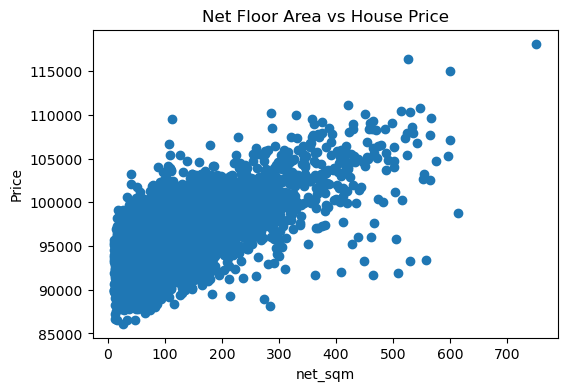

In [46]:
plt.figure(figsize=(6,4))
plt.scatter(df['net_sqm'], df['price'])
plt.xlabel("net_sqm")
plt.ylabel("Price")
plt.title("Net Floor Area vs House Price")
plt.show()

The scatter plot shows a clear positive relationship between net floor area (net_sqm) and house price, indicating that larger properties generally have higher prices. This suggests that floor area is an important feature for predicting house price.

As net_sqm increases, the range of house prices becomes wider, indicating that prices are more varied for larger properties. This indicates that prices for larger homes are less consistent and may be harder to predict accurately. A small number of large properties with very high prices are also observed, which may affect model performance.

A scatter plot was chosen for this analysis because both net_sqm and house price are continuous variables. Scatter plots are effective for showing how two continuous variables relate to each other and for identifying overall trends and variation in the data. In comparison, histograms only show the distribution of a single variable, while boxplots are more suitable for grouped or discrete features.

From a modelling perspective, the strong positive relationship supports the use of regression-based models. However, the wider price variation for larger properties suggests that models which can better handle uneven patterns in the data, such as tree-based models, may also perform well. Feature scaling or transformation may be considered for linear models to improve prediction stability.

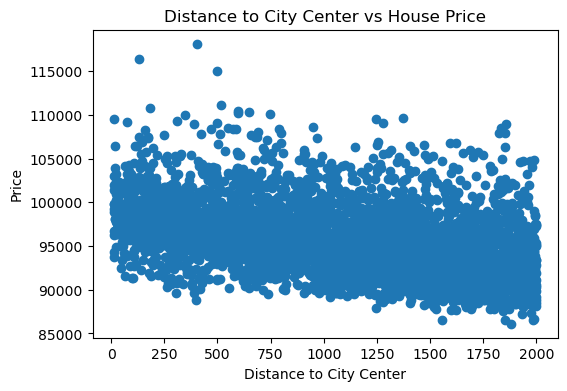

In [47]:
plt.figure(figsize=(6,4))
plt.scatter(df['center_distance'], df['price'])
plt.xlabel("Distance to City Center")
plt.ylabel("Price")
plt.title("Distance to City Center vs House Price")
plt.show()

The scatter plot shows a general negative relationship between distance to the city center and house price, indicating that properties located closer to the city center tend to have higher prices, while prices generally decrease as distance increases. This aligns with typical urban housing patterns, where central locations command a premium due to accessibility and convenience.

Although the overall trend is downward, there is considerable spread in house prices at most distance levels, suggesting that distance to the city center alone does not fully explain price variation. This indicates that other factors, such as property size, number of bedrooms, and proximity to metro stations, also play important roles in determining house prices.

A scatter plot was chosen for this analysis because both distance to city center and house price are continuous variables. Scatter plots are well suited for visualising continuous feature-target relationships, allowing trends, variance, and potential non-linear patterns to be observed. In contrast, histograms only show individual variable distributions, while boxplots are more appropriate for grouped or discrete features.

From a modelling perspective, the observed negative trend suggests that distance to the city center is a relevant predictive feature. However, the wide spread of prices indicates that models capable of capturing interactions and non-linear effects, such as tree-based models, may perform better than strictly linear models when this feature is used.

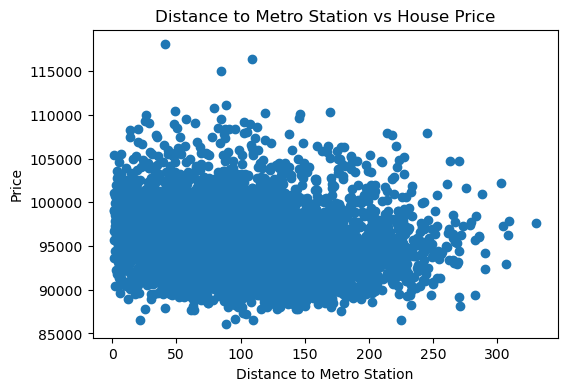

In [48]:
plt.figure(figsize=(6,4))
plt.scatter(df['metro_distance'], df['price'])
plt.xlabel("Distance to Metro Station")
plt.ylabel("Price")
plt.title("Distance to Metro Station vs House Price")
plt.show()

The scatter plot shows a generally negative relationship between distance to the nearest metro station and house price, indicating that properties located closer to metro stations tend to be priced higher. This suggests that buyers are willing to pay more for properties that are closer to public transportation due to convenience.

However, the relationship is not strongly linear, as there is considerable variation in house prices across most distance values. This suggests that while proximity to a metro station is an important factor, it does not solely determine house prices and likely interacts with other features such as property size, number of bedrooms, and distance to the city center.

A scatter plot was chosen because both metro distance and house price are continuous variables. This visualisation allows trends, variance, and potential non-linear patterns to be observed, which would not be visible using histograms or boxplots.

From a modelling perspective, the weak but observable negative trend suggests that metro distance should be retained as a predictive feature, and models capable of capturing interactions and non-linear effects, such as tree-based models, may perform better than simple linear models.

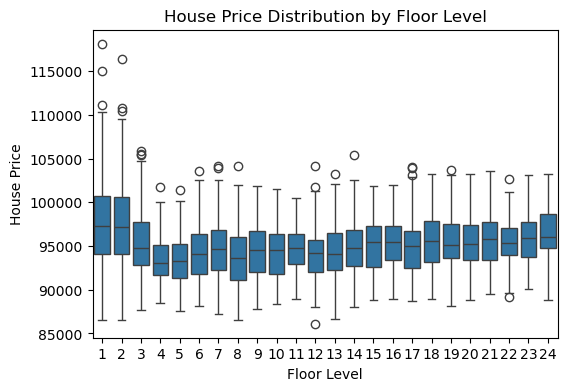

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['floor'], y=df['price'])
plt.xlabel("Floor Level")
plt.ylabel("House Price")
plt.title("House Price Distribution by Floor Level")
plt.show()

The boxplot shows how house prices differ across various floor levels. Median house prices increase slightly for higher floors, suggesting that properties on higher floors generally tend to be more expensive. 

The range of prices varies across floor levels, with outliers present at both lower and higher floors. This shows that floor level alone does not fully explain house price differences, and that other features also influence prices within each floor group.

A boxplot was used instead of a scatter plot because floor level is a discrete numerical variable. The boxplot makes it easier to compare house price distributions across different floor levels by clearly showing the median, spread, and outliers.

From a modelling perspective, the discrete nature of floor level and the variation in prices suggest that models capable of handling non-linear relationships, such as tree-based models, may capture its effect more effectively than strictly linear models.

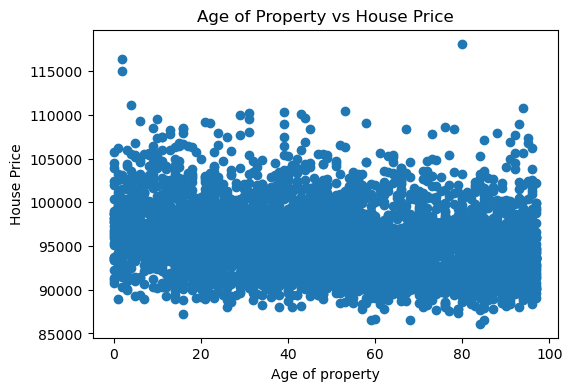

In [50]:
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['price'])
plt.xlabel("Age of property")
plt.ylabel("House Price")
plt.title("Age of Property vs House Price")
plt.show()

The scatter plot shows a weak negative relationship between property age and house price, indicating that newer properties tend to be slightly more expensive, while older properties generally have lower prices. However, the relationship is not strongly linear, as house prices remain widely spread across almost all age values.

The large overlap in price ranges for both newer and older properties suggests that age alone is not a strong determinant of house price. Other factors such as location, floor area, and number of bedrooms likely play a more significant role in explaining price differences, with property age acting as a secondary or interacting feature.

A scatter plot was chosen for this analysis because both property age and house price are continuous variables. This visualisation allows the overall trend, variability, and potential non-linear patterns to be observed, which would not be captured effectively using histograms or boxplots.

From a modelling perspective, the weak and noisy relationship suggests that age may have limited predictive power on its own but could still contribute useful information when combined with other features. Models that can capture interactions and non-linear effects, such as tree-based models, may better incorporate the influence of property age compared to strictly linear models.

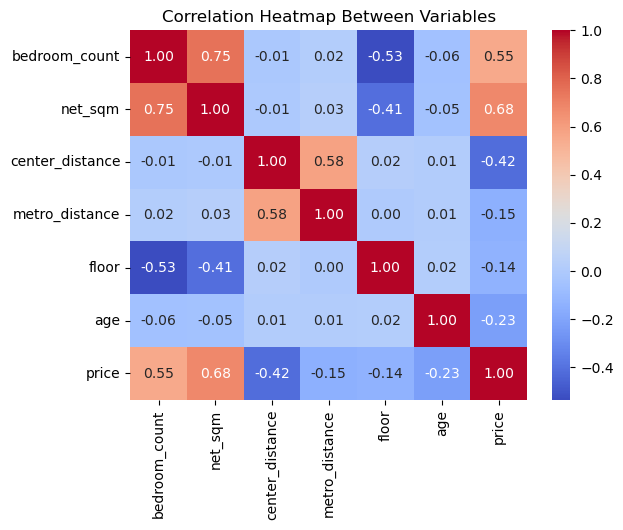

In [51]:
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap Between Variables")
plt.show()

The correlation heatmap shows that house price has a moderate positive relationship with 'net_sqm' and 'bedroom_count', indicating that larger properties with more bedrooms tend to be more expensive. In contrast, 'center_distance' and 'metro_distance' exhibit negative correlations with price, suggesting that properties located further from the city center or metro stations generally have lower market values. The 'age' feature also shows a negative correlation with price, reflecting depreciation effects over time.

These relationships indicate that property size, capacity, and location are key factors influencing house prices and are therefore expected to play a significant role in the predictive model. In addition to relationships with the target variable, the heatmap reveals notable correlations between certain input features. In particular, 'bedroom_count' and 'net_sqm' show a strong positive correlation, indicating that larger properties typically contain more bedrooms. Similarly, 'center_distance' and 'metro_distance' display a moderate positive correlation, reflecting related aspects of property location.

When some features are strongly related to each other, linear models may not perform as well or be easy to interpret. Therefore, feature selection, regularisation, or tree-based models will be considered to reduce this effect.

# 3. Data Preparation

## 3.1 Data Cleaning

In [52]:
## Clean data

## 3.2 Train-Test Split

In [53]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [54]:
## Initialise and train model


# 5. Model Evaluation

In [55]:
## Evaluate model


In [56]:
## New data

## Predict


## Iterative model development


In [57]:
## Further feature engineering / feature selection